## Build dataset for binary classifier

In [42]:
import os
import itertools
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import pandas as pd
from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("bmh")



In [3]:
original_data_path = '../data/original'
filepaths = [os.path.join(original_data_path, f) for f in os.listdir(original_data_path) if f!='.DS_Store']

filepaths

['../data/original/Columbus Zoo',
 '../data/original/Cincinnati Zoo',
 '../data/original/National Zoo',
 '../data/original/Clean']

In [4]:
include_folders = ['../data/original/National Zoo',
 '../data/original/Cincinnati Zoo',
 '../data/original/Columbus Zoo']

## Labels

In [5]:
data_folders = include_folders
labels = []

def get_labels(foldername):
    labels = [f for f in os.listdir(foldername)]
    return labels

In [6]:
values = map(get_labels, data_folders)
labels.extend(values)
labels = list(itertools.chain(*labels))

In [7]:
labels

['Spike',
 'Swarna',
 'Kamala',
 'Maharani',
 'Schottzie',
 'Sabu',
 'Jati',
 'MyThai',
 'Sunny',
 'Connie',
 'Rudy',
 'Beco',
 'Pheobe',
 'Hank']

In [8]:
print(f" Labels: {labels}, \n No of labels:{len(labels)}")

 Labels: ['Spike', 'Swarna', 'Kamala', 'Maharani', 'Schottzie', 'Sabu', 'Jati', 'MyThai', 'Sunny', 'Connie', 'Rudy', 'Beco', 'Pheobe', 'Hank'], 
 No of labels:14


### All Images

In [9]:
data = {}
data['filepath']=[]
data['image']=[]
data['imagename'] = []
data['label'] = []
data["extension"] = []

extension = set()
empty_files = set()

for image_folder in data_folders:
    for (dirpath, dirnames, filenames) in os.walk(image_folder):
        if dirnames == ".DS_Store":
            continue
            
        for f in tqdm(filenames):
            
            if f == ".DS_Store":
                continue
            
            ## check image
            size = os.stat(os.path.join(dirpath,f)).st_size
            
            if size == 0:
                empty_files.add(os.path.join(dirpath,f))
                continue
                
            ## found two images - odd images - Hank_IMG_6061.JPG, Connie_IMG_3589
            label = os.path.basename(dirpath)
            imagename = f"{label}_{f}"
            
            
            
            if imagename in ['Connie_IMG_3589.JPG','Hank_IMG_6061.JPG']:
                print("Ignoring image ",imagename)
                continue
            
            filename, file_extension = os.path.splitext(f)
            
            ## check image files
            if file_extension==".JPG":
                img = cv2.imread(os.path.join(dirpath, f))
                if img is None:
                    continue
            
                if len(img.shape)!=3:
                    print(img.shape)
                    continue
                    
            data["extension"].append(file_extension)
            data['label'].append(label)
            data['image'].append(f)
            data['imagename'].append(imagename)
            data['filepath'].append(os.path.join(dirpath, f))

0it [00:00, ?it/s]
100%|██████████| 1276/1276 [06:11<00:00,  3.40it/s]
0it [00:00, ?it/s]
100%|██████████| 756/756 [03:09<00:00,  3.67it/s]
0it [00:00, ?it/s]
 13%|█▎        | 290/2190 [01:11<08:24,  3.76it/s]

Ignoring image  Connie_IMG_3589.JPG


 84%|████████▍ | 1902/2265 [08:41<01:36,  3.76it/s]

Ignoring image  Hank_IMG_6061.JPG


100%|██████████| 2265/2265 [10:18<00:00,  3.00it/s]


In [10]:
df = pd.DataFrame(data)

In [11]:
print(f" No of files found: {df.shape[0]}")

 No of files found: 19182


## Exploratory Data Analysis

In [12]:
df["extension"].value_counts()

.JPG    18136
.MOV     1045
.AAE        1
Name: extension, dtype: int64

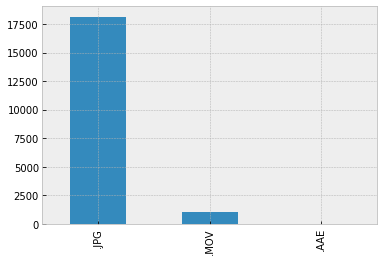

In [47]:
df["extension"].value_counts().plot(kind="bar")

Pheobe       2539
Hank         2263
Connie       2189
Rudy         1897
Swarna       1553
Beco         1339
Maharani     1276
Spike        1271
Kamala       1066
Sunny        1049
Sabu          817
MyThai        756
Jati          592
Schottzie     575
Name: label, dtype: int64

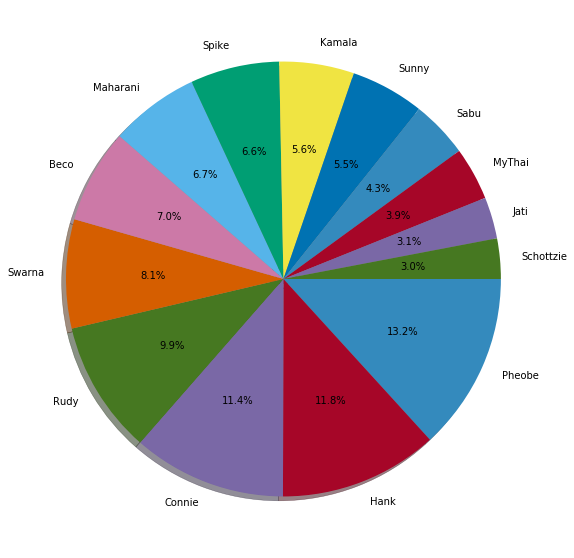

In [44]:
plt.figure(figsize=(20,10))
cnts = list(df["label"].value_counts())
cnts = [(i/sum(cnts))*100 for i in cnts]

#colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.pie(cnts, labels=df["label"].value_counts().keys(),
autopct='%1.1f%%',
counterclock=False, shadow=True)


df["label"].value_counts()

In [79]:
df.head()

,filepath,image,imagename,label,extension
0,../data/original/National Zoo/Spike/IMG_0941.JPG,IMG_0941.JPG,Spike_IMG_0941.JPG,Spike,.JPG
1,../data/original/National Zoo/Spike/IMG_0443.JPG,IMG_0443.JPG,Spike_IMG_0443.JPG,Spike,.JPG
2,../data/original/National Zoo/Spike/IMG_0778.JPG,IMG_0778.JPG,Spike_IMG_0778.JPG,Spike,.JPG
3,../data/original/National Zoo/Spike/IMG_1047.JPG,IMG_1047.JPG,Spike_IMG_1047.JPG,Spike,.JPG
4,../data/original/National Zoo/Spike/IMG_0358.JPG,IMG_0358.JPG,Spike_IMG_0358.JPG,Spike,.JPG


### Display grid of images

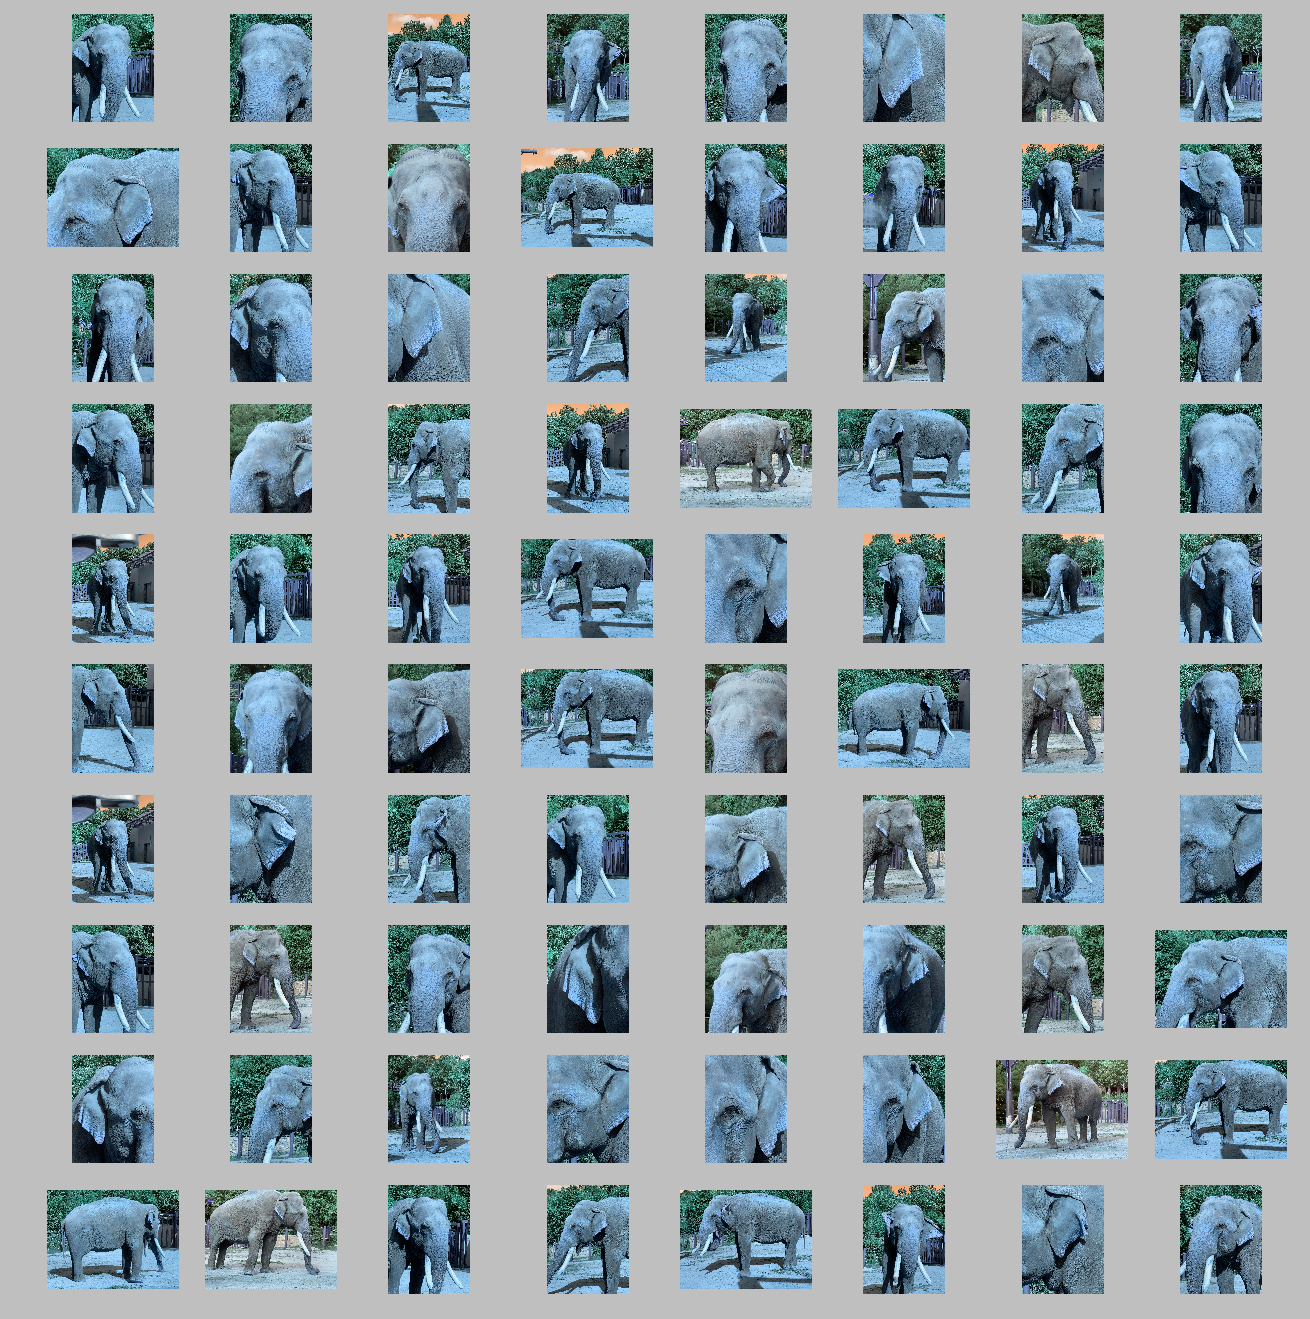

In [87]:
import imageio
from IPython.display import display, Image

def show_images(df):
    n_row = 10
    n_col = 8
    _, axs = plt.subplots(n_row, n_col, figsize=(20, 20))
    axs = axs.flatten()
    imgs = df.loc[:100,["filepath"]].values.astype(str)
    
    for img, ax in zip(imgs, axs):
        ax.imshow(cv2.imread(img[0]))
        ax.grid(False)
        ax.axis("off")
    
    plt.axis("off")
    plt.show()
    
    
show_images(df)

In [48]:
print(f"No of empty files: {len(empty_files)}")

No of empty files: 1


In [116]:
## Test cv2 resize


<img src="../data/original/National Zoo/Spike/IMG_0941.JPG"/>

### Resize and copy to the folder

In [100]:
## resize:

## Create images from mov files
dim = (227, 227)
def getFrame(vidcap,sec,path):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        print('Original Dimensions : ',image.shape)
        resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(path, resized)     # save frame as JPG file
    return hasFrames

def get_images(save_path, video_file_path,filename):
    frameRate = 0.5 # capture image in each 0.5 second
    image_write_path  = lambda count: os.path.join(save_path,"%s_frame%d.jpg" % (filename,count))
    count=1
    sec = 0
    vidcap = cv2.VideoCapture(video_file_path)
    success = getFrame(vidcap,sec,image_write_path(count))
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(vidcap,sec,image_write_path(count))
        
        
def resize_image(imgpath,savepath):
    imgScale = 0.4
    img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
    
    # resize image
    newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
    newimg = cv2.resize(oriimg,(int(newX),int(newY)))
    cv2.imwrite(savepath, resized)
    return 

In [101]:
save_path = os.path.join("../data/binary-classifier/")
def save_images(df):
    for idx, row in tqdm(df.iterrows()):
        extension = row["extension"]
        current_file_path = row["filepath"]
        label = row["label"]
        newimagename = row["imagename"]
        
        if extension==".MOV":
            ## get frame and resize and save
            get_images(save_path, current_file_path,newimagename)
        elif extension==".JPG":
            #print(current_file_path)
            resize_image(current_file_path, os.path.join(save_path,newimagename))  
        else:
            print(current_file_path)
            continue

In [102]:
save_images(df)


0it [00:00, ?it/s]


NameError: name 'oriimg' is not defined

In [44]:
print(f" No of files copied into binary classifier folder: {len(os.listdir(save_path))}")

 No of files copied into binary classifier folder: 7579


## Build csv file

In [10]:
## Build csv file - image path
save_path = os.path.join("../data/binary-classifier/")
csv_data = {}
csv_data["path"] = []

for (dirpath, dirnames, filenames) in os.walk(save_path):
        if dirnames == ".DS_Store":
            continue
            
        for f in filenames:
            
            if f == ".DS_Store":
                continue
            
            ## check image
            size = os.stat(os.path.join(dirpath,f)).st_size
            
            if size == 0:
                empty_files.add(os.path.join(dirpath,f))
                continue
                
            csv_data['path'].append(f)

In [22]:
csv_df = pd.DataFrame(csv_data)
csv_df.to_csv(os.path.join(save_path,"binary_classifier_imagepaths.csv"),index=False)

In [23]:
csv_df.head()

,path
0,Pheobe_IMG_5409.JPG
1,Pheobe_IMG_5460.JPG
2,Pheobe_IMG_3734.MOV_frame3.jpg
3,Maharani_IMG_3575.JPG
4,Hank_IMG_7264.JPG


In [25]:
df = pd.read_csv(os.path.join(save_path,"binary_classifier_imagepaths.csv"))


In [26]:
df

,path
0,Pheobe_IMG_5409.JPG
1,Pheobe_IMG_5460.JPG
2,Pheobe_IMG_3734.MOV_frame3.jpg
3,Maharani_IMG_3575.JPG
4,Hank_IMG_7264.JPG
5,Rudy_IMG_0842.JPG
6,Rudy_IMG_1252.JPG
7,Sabu_IMG_4245.JPG
8,Connie_IMG_2998.JPG
9,Jati_IMG_2677.JPG


In [29]:
import torch
x = torch.tensor(1)

In [30]:
x

tensor(1)